# PDE animation

In this notebook we work on developing the animation for the time evolution of the pressure pulse.

\begin{equation}
    p_j^{n+1} = c_j^2 \frac{dt^2}{dx^2}\left(p_{j+1}^n -2p_j^n + p_{j-1}^{n}\right)
        +2p_j^n - p_j^{n-1} + s_j^ndt^2\,.
\end{equation}

### Boundary and the initial conditions 

\begin{align}
    p(x=0,t) &= 0\\
    p(x=x_{max},t) &= 0\\
    p(x,t=0) &= 0\\
    \partial p(x,t=0) &= 0\\
\end{align}

### Source term

\begin{align}
    s(x,t) &= \delta (x-x_s)f(t)\,,\quad \text{with}\\
    f(t)   &= -8f_0(t-t_0)e^{-{(4f_0)^2}.(t-t_0)^2}
\end{align}

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.use('nbagg')
%matplotlib notebook

In [19]:
# Parameter Configuration 
# -----------------------
xmin = 0                #starting spatial point in meters
xmax = 10**4            #ending spatial point in meters
nx = 10**4              #number of spatial grid points
dx = (xmax - xmin)/nx   #spatial step
c0 = 600.               #speed of sound/wave
x_source = int(nx/2)    #location of the source in grid points (in the middle of the grid)
nt = 1001               #number of time steps
dt = 0.0010             #size of the timestep
# Source time function parameters
#--------------------------------

f0 = 25.                #dominant frequency in Hz
t0 = 4./f0              #time shift (within the Gaussian argument) in seconds
xsource = int(nx/2)     #source position in grid points

def source(time):
    return -8. * (time - t0) * f0 * (np.exp(-1.0 * (4*f0) ** 2 * (time - t0) ** 2))

print (c0/(dx/dt))

0.6


<IPython.core.display.Javascript object>


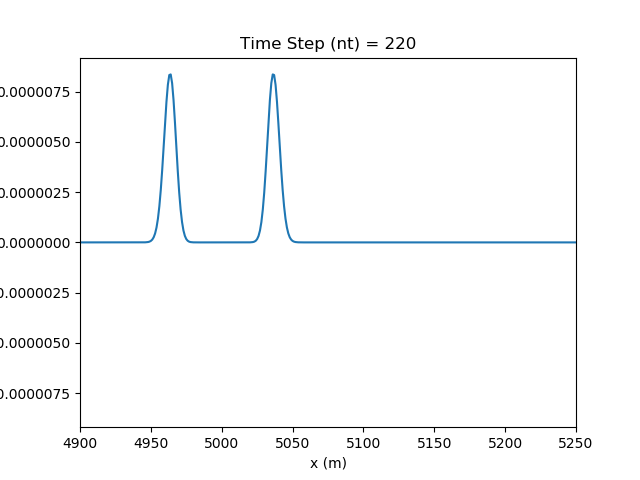

/home/viniciushenning/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Attempting to set identical bottom == top == -0.0 results in singular transformations; automatically expanding.
  if sys.path[0] == '':


Text(0, 0.5, 'Pressure Amplitude')

In [20]:
p = np.zeros(nx)                # Starting pressure vector
pold = p.copy()                 # Vector to be updated
d2px = np.zeros(nx)             # Second derivative term
t = np.arange(0,nt*dt,dt)       # Time vector (interval)

fig, ax = plt.subplots()        # Creating the fig and the ax objects to be used later
#plt.ioff()                       
#fig.canvas.draw()

line, = ax.plot(p)
ax.set_xlim(4900,5250)
ax.set_ylim(-np.max(p), np.max(p))
ax.set_title('Time Step (nt) = 0')
ax.set_xlabel('x (m)')
ax.set_ylabel('Pressure Amplitude')

In [1]:
for i in range(nt):
    for j in range(1, nx-1):
        d2px[j] = (p[j+1] - 2*p[j] + p[j-1])/dx**2
    pnew = 2*p - pold + (c0**2)*(dt**2)*d2px
    pnew[xsource] = pnew[xsource] + source(i*dt)*dt**2
    pold, p = p, pnew
    
    ax.set_title('Time Step (nt) = %d' %i)
    ax.set_ylim(-1.1*np.max(abs(p)), 1.1*np.max(abs(p)))
    if i%5 == 0:
        line.set_ydata(pnew)
        plt.gcf().canvas.draw()
    
    
    
        

NameError: name 'nt' is not defined

## Following the lecture on difusion equation

The equation to be solved is the following

\begin{equation}
    \frac{dT_i}{dt} = \alpha\left[\frac{T_{i+1} - T_i}{(\Delta x)^2} - \frac{T_{i} - T_{i-1}}{(\Delta x)^2}\right] \simeq
        \frac{T_i(t+\Delta t) - T_i(t)}{\Delta t}\,,
\end{equation}

where the equation above is the difusion equation for a one dimensional plate. The index $i$ represents
in which point it is being calculated, $\alpha$ is the diffusivity coeffient.

We are going to adopt the following parameters for the problem

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

nx = 10        # number of nodes in x
L = 0.1         # length of the plate in (m)
a = 10**(-4)    # diffusivity coefficient
dt = 0.1        # step size in time (s)
T1 = 40         # Temperature of left part of the plate in (°C)
T2 = 20         # Temperature of right part of the plate in (°C)
dx = L/nx       # displacement in the x direction in (m)
t_final = 60    # for how long we are going to emulate it

t = np.arange(0, t_final, dt)
x = np.linspace(0, L, nx)

T = np.zeros(nx)
Tnew = np.zeros(nx)